In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gamma = 0.95
nA = 4
nS = 9
p = 0.8

## Bias Game

In [4]:
def rewardnstate(a, s):
    r, state, terminal = P[s][a]
    if s==1:
        r = r + np.random.uniform(-1, 1)
    return r, state, terminal
  
def act_functn(Q, state, state_visits):
    #eps = 0.1
    #eps = 1/np.power(state_visits[state], 0.2)
    eps = 1/np.sqrt(state_visits[state])
    state_visits[state] += 1
    if np.random.choice([True, False], p=[1-eps, eps]):
        action = np.argmax(Q[state, :nAfes[state]])
    else:
        action = np.random.choice(nAfes[state])
    return action

In [7]:
nAfes = [1, 8, 2] #num_Actions_for_each_state

def train(epoch = 1000):
    np.random.seed(20)
    nS = 3
    nA = 8
    count_matrix_a = np.ones([nS, nA])
    count_matrix_b = np.ones([nS, nA])
    state_visits = np.ones(nS)
    reward_list = []
    maximal_value_a = []
    maximal_value_b = []
    maximal_value = []
    pref_list = []
    cumsum = 0
    count = 0
    Qa = np.random.rand(nS, nA) #Random between -0.5 and 0.5
    Qb = np.random.rand(nS, nA)
    Qa[0], Qb[0] = 0, 0
    start_state = 2
    for i in range(epoch):
        state = start_state
        terminal = True if state==0 else False
        while(not terminal):
            action = act_functn(Qa + Qb, state, state_visits)
            reward, next_state, terminal = rewardnstate(action, state)
            cumsum += reward
            count += 1


            if np.random.choice([True, False]):#Qa
                alpha_a = (1/np.power(count_matrix_a[state, action], p))
                action_star = np.argmax(Qa[next_state, :nAfes[next_state]])
                action_l = np.argmin(Qa[next_state, :nAfes[next_state]])
                diff = np.abs(Qb[next_state, action_star]-Qb[next_state, action_l])
                beta_a = diff/(100+diff)
                delta = reward + gamma*(beta_a*Qa[next_state, action_star]
                                        + (1-beta_a)*Qb[next_state, action_star]) - Qa[state, action]
                Qa[state, action] += alpha_a*(delta)
                count_matrix_a[state, action] += 1
            else:
                alpha_b = (1/np.power(count_matrix_b[state, action], p))
                action_star = np.argmax(Qb[next_state])#Qb
                action_l = np.argmin(Qb[next_state])
                diff = np.abs(Qa[next_state, action_star]-Qa[next_state, action_l])
                beta_b = diff/(100+diff)
                delta = reward + gamma*(beta_b*Qb[next_state, action_star]
                                        +(1-beta_b)*Qa[next_state, action_star])-Qb[state, action]
                Qb[state, action] += alpha_b*(delta)
                count_matrix_b[state, action] += 1


            state = next_state

        reward_list.append(cumsum/count)
        maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
        maximal_value_b.append(np.max(Qb[start_state, :nAfes[start_state]]))
        pref = .0
        pref += Qa[2][0] - Qa[2][1] #preference of left over right
        pref += Qb[2][0] - Qb[2][1] #preference of left over right
        pref /= float(2)
        pref_list.append(pref)
    return pref_list, maximal_value_a, maximal_value_b, Qa, Qb

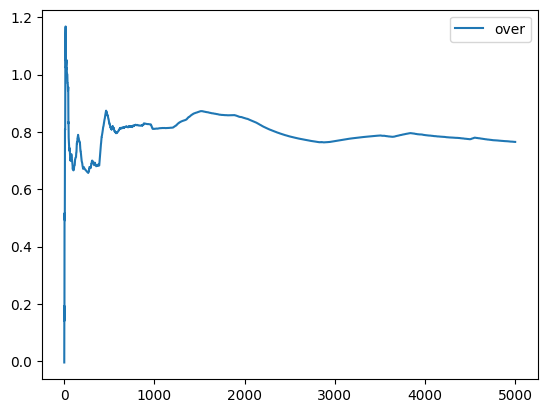

0.7652876995079114


In [14]:
mu = 1
gamma = 1
P = {
    0:{0: (0, 0, True)}, #state:{action: (reward, next state, terminal)}
    1:{0: (mu, 0, True),
       1: (mu, 0, True),
       2: (mu, 0, True),
       3: (mu, 0, True),
       4: (mu, 0, True),
       5: (mu, 0, True),
       6: (mu, 0, True),
       7: (mu, 0, True)}, 
    2:{0: (0, 1, False),
       1: (0, 0, True)}
}
pref_list_over, maximal_value_a_over, maximal_value_b_over, Qa_over, Qb_over = train(5000)
plt.plot(pref_list_over, label = "over")
plt.legend()
plt.show()
print(pref_list_over[-1])

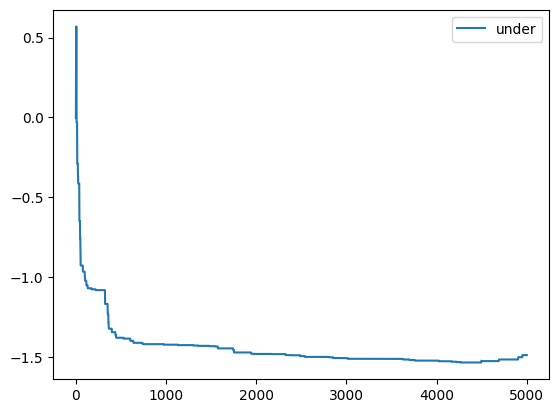

-1.4878953780352275


In [15]:
mu = -1
gamma = 1
P = {
    0:{0: (0, 0, True)}, #state:{action: (reward, next state, terminal)}
    1:{0: (mu, 0, True),
       1: (mu, 0, True),
       2: (mu, 0, True),
       3: (mu, 0, True),
       4: (mu, 0, True),
       5: (mu, 0, True),
       6: (mu, 0, True),
       7: (mu, 0, True)}, 
    2:{0: (0, 1, False),
       1: (0, 0, True)}
}
pref_list_under, maximal_value_a_under, maximal_value_b_under, Qa_under, Qb_under = train(5000)
plt.plot(pref_list_under, label = "under")
plt.legend()
plt.show()
print(pref_list_under[-1])

# mu = 1 mu = -1
# 0.8109077770750113 -1.422531091043924 epoch 1000
# 0.7683828158670879 -1.506782806816227 epoch 3000
# 0.7652876995079114 -1.4878953780352275 epoch 5000


In [63]:
np.mean(pref_list[1000:])-mu

-0.46981791223903413

## Grid Game

In [3]:
#r1, r2, next_state, terminal: 0: up, 1: down, 2: right, 3: left
# Map = [
#         "CCG",012
#         "CCC",345
#         "SCC",678
#     ]
P = {
    0:{
        0:(-12, 10, 0, False),
        1:(-12, 10, 3, False),
        2:(-12, 10, 1, False),
        3:(-12, 10, 0, False)
    },
    1:{
        0:(-12, 10, 1, False),
        1:(-12, 10, 4, False),
        2:(-12, 10, 2, False),
        3:(-12, 10, 0, False)
    },
    2:{                        #Goal
        0:(5, 5, 9, True),
        1:(5, 5, 9, True),
        2:(5, 5, 9, True),
        3:(5, 5, 9, True)
    },
    3:{
        0:(-12, 10, 0, False),
        1:(-12, 10, 6, False),
        2:(-12, 10, 4, False),
        3:(-12, 10, 3, False)
    },
    4:{
        0:(-12, 10, 1, False),
        1:(-12, 10, 7, False),
        2:(-12, 10, 5, False),
        3:(-12, 10, 3, False)
    },
    5:{
        0:(-12, 10, 2, False),
        1:(-12, 10, 8, False),
        2:(-12, 10, 5, False),
        3:(-12, 10, 4, False)
    },
    6:{                        #Starting state
        0:(-12, 10, 3, False),
        1:(-12, 10, 6, False),
        2:(-12, 10, 7, False),
        3:(-12, 10, 6, False)
    },
    7:{
        0:(-12, 10, 4, False),
        1:(-12, 10, 7, False),
        2:(-12, 10, 8, False),
        3:(-12, 10, 6, False)
    },
    8:{
        0:(-12, 10, 5, False),
        1:(-12, 10, 8, False),
        2:(-12, 10, 8, False),
        3:(-12, 10, 7, False)
    },
    9:{                       #End of episode state
        0:(0, 0, 9, True),
        1:(0, 0, 9, True),
        2:(0, 0, 9, True),
        3:(0, 0, 9, True)
    }
}

In [4]:
def rewardnstate(a, s):
    r1, r2, state, terminal = P[s][a]
    reward = np.random.choice([r1, r2])
    return reward, state, terminal

def act_functn(Q, state, state_visits):
    #eps = 0.1
    #eps = 1/np.power(state_visits[state], 0.2)
    eps = 1/np.sqrt(state_visits[state])
    state_visits[state] += 1
    if np.random.choice([True, False], p=[1-eps, eps]):
        action = np.argmax(Q[state])
    else:
        action = np.random.choice(nA)
    return action

In [5]:
np.random.seed(2)
count_matrix_a = np.ones([nS, nA])
count_matrix_b = np.ones([nS, nA])
state_visits = np.ones(nS)
reward_list = []
maximal_value_a = []
maximal_value_b = []
cumsum = 0
count = 0
Qa = np.random.rand(nS+1, nA) #Random between -0.5 and 0.5
Qb = np.random.rand(nS+1, nA)
Qa[nS], Qb[nS] = 0, 0
for i in range(10000):
    state = 6
    terminal = True if state==2 else False
    while(not terminal):
        action = act_functn((Qa + Qb)/2, state, state_visits)
        reward, next_state, terminal = rewardnstate(action, state)
        cumsum += reward
        count += 1
        
        
        if np.random.choice([True, False]):#Qa
            alpha_a = (1/np.power(count_matrix_a[state, action], p))
            action_star = np.argmax(Qa[next_state])
            action_l = np.argmin(Qa[next_state])
            diff = np.abs(Qb[next_state, action_star]-Qb[next_state, action_l])
            beta_a = diff/(1000+diff)
            delta = reward + gamma*(beta_a*Qa[next_state, action_star]+(1-beta_a)*Qb[next_state, action_star])-Qa[state, action]
            Qa[state, action] += alpha_a*(delta)
            count_matrix_a[state, action] += 1
        else:
            alpha_b = (1/np.power(count_matrix_b[state, action], p))
            action_star = np.argmax(Qb[next_state])#Qb
            action_l = np.argmin(Qb[next_state])
            diff = np.abs(Qa[next_state, action_star]-Qa[next_state, action_l])
            beta_b = diff/(1000+diff)
            delta = reward + gamma*(beta_b*Qb[next_state, action_star]+(1-beta_b)*Qa[next_state, action_star])-Qb[state, action]
            Qb[state, action] += alpha_b*(delta)
            count_matrix_b[state, action] += 1

        
        state = next_state

    reward_list.append(cumsum/count)
    maximal_value_a.append(np.max(Qa[6]))
    maximal_value_b.append(np.max(Qb[6]))

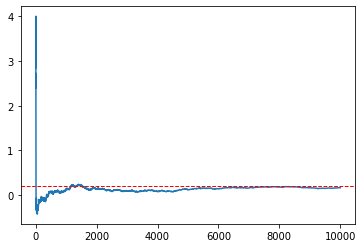

In [6]:
props = {
    "width": 1,
    "headwidth": 10
}
plt.plot(reward_list)#reward per step
plt.axhline(y = 0.2, color = "r", linestyle = "--", linewidth = 1)
#plt.annotate('y = %s' % round(reward_list[-1], 4), xy=(8000, reward_list[-1]), xytext=(9000, -0.2), arrowprops = props)
plt.show()

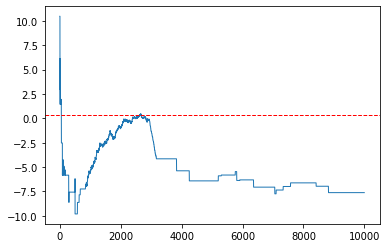

In [7]:
props = {
    "width": 1,
    "headwidth": 10
}

plt.plot(maximal_value_a, linewidth=1)
plt.axhline(y = 0.36, color = "r", linestyle = "--", linewidth = 1)
#plt.annotate('y = %s' % round(maximal_value_a[-1], 4), xy=(8000, maximal_value_a[-1]), xytext=(9000, -2), arrowprops = props)
plt.show()

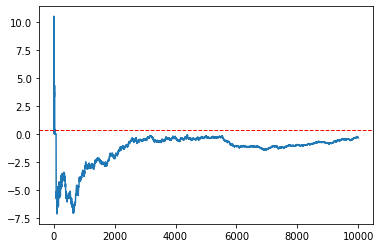

In [8]:
props = {
    "width": 1,
    "headwidth": 10
}
plt.plot(maximal_value_b)
plt.axhline(y = 0.36, color = "r", linestyle = "--", linewidth = 1)
#plt.annotate('y = %s' % round(maximal_value_b[-1], 4), xy=(300000, maximal_value_b[-1]), xytext=(350000, -2), arrowprops = props)
plt.annotate
plt.show()